### **1. Importing Libraries**

In [1]:
import pandas as pd                                                 # Importing for panel data analysis
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#--------------------~-----------------------------------------------------------------------------------------------------------
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
#--------------------~-----------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from statistics import mean, stdev
from itertools import combinations
from sklearn.svm import SVC
import pickle
#--------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [2]:
# Import training data into pandas dataframe
footbal_df = pd.read_csv('./Dataset/Dataset1/football_data.csv')
del footbal_df[footbal_df.columns[0]] # removing the index column
print('Shape of the dataset:', footbal_df.shape)
footbal_df.head(3)

Shape of the dataset: (18207, 60)


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Unnamed: 60
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,NaN
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,NaN
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,NaN


### **2. Data Preprocessing**
- Here we try to understand our data and preprocess it to the desirable format.
- All the observations are written in bullet points in markdown.

In [3]:
footbal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Special                   18207 non-null  object 
 10  Preferred Foot            18159 non-null  object 
 11  International Reputation  18159 non-null  object 
 12  Weak Foot                 18159 non-null  float64
 13  Skill Moves               18159 non-null  float64
 14  Work R

In [4]:
footbal_df.loc[461, 'Preferred Foot']

'2006'

- From footbal_df.info(), we can see that the dataset is a mix of continuous and categorical values. 
- Let's analyze each of the values and select the relevant columns.

In [5]:
footbal_df.duplicated(keep=False)

0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Length: 18207, dtype: bool

- There are no duplicate rows

In [6]:
footbal_df = footbal_df.drop('ID', axis=1) # removing the ID column as it's not a descriptive attribute
footbal_df = footbal_df.drop('Name', axis=1) # removing the Name column as it's not a descriptive attribute
footbal_df = footbal_df.drop('Unnamed: 60', axis=1) # removing the 'Unnamed: 60' column as it has less than 0.1% of the data and other values are Null

In [7]:
footbal_df.describe() # distribution of continuous values

,Age,Overall,Potential,Weak Foot,Skill Moves,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,2.944215,2.362685,45.560273,52.282670,58.676579,42.938983,55.346990,...,48.561760,58.630762,47.283496,47.701911,45.663858,16.664244,16.391707,16.230409,16.390881,16.708519
std,4.669943,6.908930,6.136496,0.664361,0.756561,19.519091,17.393362,14.706456,17.698047,18.922722,...,15.704481,11.454790,19.900403,21.663252,21.290492,17.733472,16.908588,16.501483,17.035594,17.956907
min,16.000000,46.000000,48.000000,1.000000,1.000000,2.000000,4.000000,7.000000,4.000000,4.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,3.000000,2.000000,30.000000,44.000000,54.000000,30.000000,49.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,3.000000,2.000000,49.000000,56.000000,62.000000,44.000000,61.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,3.000000,3.000000,62.000000,64.000000,68.000000,57.000000,68.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,5.000000,5.000000,95.000000,94.000000,93.000000,90.000000,97.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


- Let's analyze each of the attributes and categorize them into continuous and categorical
- Also, let's keep the most relevant attributes and discard others.

In [8]:
footbal_df['Age'].describe()

count    18207.000000
mean        25.122206
std          4.669943
min         16.000000
25%         21.000000
50%         25.000000
75%         28.000000
max         45.000000
Name: Age, dtype: float64

In [9]:
footbal_df['Age'].unique()

array([31, 33, 26, 27, 32, 25, 29, 28, 24, 30, 19, 40, 22, 23, 34, 35, 36,
       37, 21, 18, 20, 39, 41, 17, 38, 45, 42, 16, 44])

In [10]:
footbal_df['Nationality']

0        Argentina
1         Portugal
2           Brazil
3            Spain
4          Belgium
           ...    
18202      England
18203       Sweden
18204      England
18205      England
18206      England
Name: Nationality, Length: 18207, dtype: object

In [11]:
len(footbal_df['Nationality'].unique())

164

In [12]:
footbal_df = footbal_df.drop('Nationality', axis=1) # removing the 'Nationality' column as it's not a descriptive attribute

-  'Overall' refers to a composite rating or score that represents a player's overall skill or performance level. This overall rating is often used in football video games.

In [13]:
footbal_df['Overall'].describe()

count    18207.000000
mean        66.238699
std          6.908930
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64

In [14]:
footbal_df['Overall'].unique()

array([94, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77,
       76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60,
       59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46])

In [15]:
footbal_df['Potential'].describe()

count    18207.000000
mean        71.307299
std          6.136496
min         48.000000
25%         67.000000
50%         71.000000
75%         75.000000
max         95.000000
Name: Potential, dtype: float64

In [16]:
footbal_df['Potential'].unique()

array([94, 93, 92, 91, 90, 89, 95, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79,
       78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62,
       61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 48])

- 'Club' indicates the club affiliation of a player

In [17]:
footbal_df['Club']

0               FC Barcelona
1                   Juventus
2        Paris Saint-Germain
3          Manchester United
4            Manchester City
                ...         
18202        Crewe Alexandra
18203         Trelleborgs FF
18204       Cambridge United
18205        Tranmere Rovers
18206        Tranmere Rovers
Name: Club, Length: 18207, dtype: object

In [18]:
len(footbal_df['Club'].unique())

652

In [19]:
footbal_df = footbal_df.drop('Club', axis=1) # removing the 'Club' column

- 'Value' and 'Wage' represents financial aspects of a player. Therefore, we are not considering them in our analysis.

In [20]:
footbal_df = footbal_df.drop('Value', axis=1) # removing the 'Value' column
footbal_df = footbal_df.drop('Wage', axis=1) # removing the 'Wage' column

----

In [21]:
footbal_df['Special'].describe()

count     18207
unique     1433
top        1745
freq         47
Name: Special, dtype: object

In [22]:
results = footbal_df.loc[footbal_df["Special"].str.contains('€')]
results

,Age,Overall,Potential,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
461,30,80,80,€24K,2006,Right,1.0,4.0,4,High/ Low,...,65.0,74.0,30.0,41.0,34.0,13.0,12.0,13.0,8.0,16
1758,29,75,75,€15K,1876,Right,1.0,3.0,3,Medium/ High,...,48.0,72.0,68.0,77.0,72.0,9.0,11.0,14.0,9.0,12
2262,29,74,74,€16K,1879,Left,1.0,3.0,3,High/ Medium,...,63.0,68.0,24.0,55.0,26.0,9.0,6.0,10.0,7.0,8
2590,33,74,74,€13K,1743,Left,1.0,2.0,2,High/ High,...,43.0,64.0,68.0,75.0,76.0,11.0,6.0,10.0,12.0,16
5881,27,69,69,€7K,1660,Right,1.0,3.0,2,Medium/ High,...,43.0,64.0,66.0,63.0,64.0,7.0,14.0,11.0,6.0,6
6879,28,68,69,€6K,1449,Right,1.0,3.0,2,Low/ Medium,...,41.0,56.0,65.0,68.0,66.0,6.0,13.0,14.0,10.0,16
7335,30,68,68,€5K,1010,Right,1.0,2.0,1,Medium/ Medium,...,15.0,62.0,11.0,6.0,9.0,67.0,67.0,69.0,69.0,64
8569,33,67,67,€6K,1710,Right,1.0,2.0,2,High/ Medium,...,48.0,60.0,24.0,45.0,47.0,10.0,11.0,16.0,6.0,13
10334,26,65,66,€4K,1740,Left,1.0,3.0,3,High/ Medium,...,45.0,59.0,59.0,57.0,54.0,9.0,11.0,11.0,8.0,15
11432,33,64,64,€4K,1798,Left,1.0,5.0,2,Medium/ Medium,...,49.0,50.0,59.0,50.0,56.0,11.0,7.0,9.0,7.0,11


- From the analysis of 'Special' column, it doesn't seem to be an important attribute, especially to indicate about a player's performance. Therefore, we are removing it.

In [23]:
footbal_df = footbal_df.drop('Special', axis=1) # removing the 'Value' column

----

- Let's analyze the column 'Preferred foot'

In [24]:
footbal_df['Preferred Foot'].unique()

array(['Left', 'Right', '2006', '1876', '1879', '1743', '1660', '1449',
       '1010', '1710', '1740', '1798', '1701', nan, '1646', '1455',
       '1348', '1599', '1535', '1187', '1471', '1424', '1580', '856',
       '1337', '1206', '1486', '1402', '1392', '1453', '1281'],
      dtype=object)

- Let's remove all rows  for which the value of the column 'Preferred Foot' is neither 'Left', nor 'Right'

In [25]:
idxs = footbal_df[(footbal_df['Preferred Foot'] != 'Left') & (footbal_df['Preferred Foot'] != 'Right')].index.tolist()
footbal_df = footbal_df.drop(idxs, axis=0)

In [26]:
footbal_df['Preferred Foot'].unique()

array(['Left', 'Right'], dtype=object)

----

In [27]:
footbal_df['International Reputation']

0        5
1        5
2        5
3        4
4        4
        ..
18202    1
18203    1
18204    1
18205    1
18206    1
Name: International Reputation, Length: 18131, dtype: object

In [28]:
footbal_df['International Reputation'].unique()

array(['5', '4', '3', '2', '1'], dtype=object)

----

- A weak foot just means that your gameplay is better when you use one foot instead of the other.
- 5-star weak foot rating signifies that a player is equally proficient with both feet. 4-star rating suggests strong competence with their non-dominant foot. 3-star rating means the player can use their weak foot adequately. 2-star rating indicates limited ability.

In [29]:
footbal_df['Weak Foot'].unique()

array([4., 5., 3., 2., 1.])

----

- Every player in the game has an independent 'skill moves' rating, and determines how many tricks he or she can pull off. One-star players can only unleash moves in that category, whereas five-star players can nail every last one.

In [30]:
footbal_df['Skill Moves'].unique()

array([4., 5., 1., 3., 2.])

----

- 'Work Rate' refers to the extent to which a player contributes to running and chasing in a match while not in possession of the ball.
    Medium/Medium (M/M): A balanced work rate for both attacking and defensive activities. The player tends to contribute equally to both phases of the game.
    - High/Medium (H/M): The player has a higher inclination towards attacking actions but still contributes defensively.
    - Medium/High (M/H): The player is more likely to be involved in defensive tasks but still contributes to attacking play.
    - High/High (H/H): A player with a high work rate for both attacking and defensive activities. This player is often very active and covers a lot of ground.
    - Medium/Low (M/L): The player is more focused on defensive duties and is less likely to contribute significantly to attacking plays.
    - High/Low (H/L): The player has a higher work rate in attacking situations but tends to stay back more during defensive phases.
    - Low/Medium (L/M): The player is less likely to contribute to attacking plays but is reasonably involved defensively.
    - Low/High (L/H): A player with a lower inclination towards attacking actions but more active in defensive tasks.
    - Low/Low (L/L): The player has a low work rate for both attacking and defensive activities. This player may seem less involved overall.

In [31]:
footbal_df['Work Rate'].value_counts()

Work Rate
Medium/ Medium    9794
High/ Medium      3169
Medium/ High      1687
High/ High        1013
Medium/ Low        850
High/ Low          698
Low/ Medium        448
Low/ High          438
Low/ Low            34
Name: count, dtype: int64

In [32]:
footbal_df['Work Rate'].unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium',
       'Low/ Low'], dtype=object)

----

In [33]:
footbal_df['Body Type'].unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Lean', 'Normal', 'Courtois',
       'Stocky', 'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Akinfenwa'],
      dtype=object)

In [34]:
footbal_df['Body Type'].value_counts()

Body Type
Normal                 10584
Lean                    6402
Stocky                  1138
Messi                      1
C. Ronaldo                 1
Neymar                     1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Akinfenwa                  1
Name: count, dtype: int64

- We will probably have to remove all the six rows where the 'Body Type' value is anything apart from 'Normal', 'Lean', 'Stocky'.

In [35]:
idxs = footbal_df[(footbal_df['Body Type'] != 'Normal') & (footbal_df['Body Type'] != 'Lean') & (footbal_df['Body Type'] != 'Stocky')].index.tolist()
footbal_df = footbal_df.drop(idxs, axis=0)

In [36]:
footbal_df['Body Type'].unique()

array(['Lean', 'Normal', 'Stocky'], dtype=object)

- So, we have successfully preprocessed the column 'Body Type'

----

- The term "Real Face" refers to a feature in video games, particularly football simulation games like FIFA. In these games, the "Real Face" feature involves using advanced facial scanning and mapping technologies to create highly realistic and detailed representations of real-life football players within the virtual game environment. This feature doesn't provide any insights into a player's real-life performance statistics, as it's essentially a graphical and aesthetic feature.
- Let's remove the 'Real Face'

In [37]:
footbal_df = footbal_df.drop('Real Face', axis=1) # removing the 'Real Face' column

----

In [38]:
footbal_df['Position'].unique()

array(['GK', 'RCM', 'LF', 'RS', 'RCB', 'ST', 'LCM', 'CB', 'LDM', 'CAM',
       'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LW', 'LM', 'LB', 'RDM', 'RF',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

- Since, position is not indicative of player's skill/performance, we choose to drop it.

In [39]:
footbal_df = footbal_df.drop('Position', axis=1) # removing the 'Position' column

----

- Let's remove 'Jersey Number' as it is chosen at random and hence is not a very descriptive feature of a player's identity.

In [40]:
footbal_df = footbal_df.drop('Jersey Number', axis=1) # removing the 'Jersey Number' column

----

- remove 'Joined' column for 2 reasons, firstly it has 1552 missing values that make nearly 8.5% of the entire data and thus removing rows is not a good step. Also, the significance of this feature is in deriving the number of years of experience that a player has which in turn may describe how good the player is, however, that can be derived from other attributes and hence is not as much a descriptive feature as others. Therefore, it's safe to remove it.

In [41]:
footbal_df['Joined']

3         Jul 1, 2011
4        Aug 30, 2015
5         Jul 1, 2012
6         Aug 1, 2012
7        Jul 11, 2014
             ...     
18202     May 3, 2017
18203    Mar 19, 2018
18204     Jul 1, 2017
18205    Apr 24, 2018
18206    Oct 30, 2018
Name: Joined, Length: 18124, dtype: object

In [42]:
footbal_df = footbal_df.drop('Joined', axis=1) # removing the 'Joined' column

----

- In football, 'Loaned From' indicates that the player is currently playing for a team on a temporary basis and that the player's full contractual rights are still owned by the club mentioned after "Loaned from". This feature itself doesn't provide direct information about the player's performance. Instead, it describes the contractual status and the temporary nature of the player's association with the team.
- So let's remove it.

In [43]:
footbal_df = footbal_df.drop('Loaned From', axis=1) # removing the 'Loaned From' column

----

- Let's remove the column 'Contract Valid Until' because it does not directly reflect the player's performance information; rather, it indicates the duration of the contractual relationship between the player and the club.
- For a similar reason, let's remove the column 'Loaned From' as it indicates a particular player being able to temporarily play for a club other than the one to which they are currently contracted.

In [44]:
footbal_df = footbal_df.drop('Contract Valid Until', axis=1) # removing the 'Contract Valid Until' column

----

- Let's drop the 'height' and 'weight' column, as we are already considering the 'Body Type' attribute.

In [45]:
footbal_df = footbal_df.drop('Height', axis=1) # removing the 'Height' column
footbal_df = footbal_df.drop('Weight', axis=1) # removing the 'Weight' column

----

- Attribute "crossing" likely refers to a player's ability to deliver accurate and effective crosses into the penalty area from wide positions on the field

In [46]:
footbal_df['Crossing'].unique()

array(['17', '93', '81', '86', '77', '66', '13', '62', '88', '55', '84',
       '68', '82', '75', '15', '70', '58', '52', '90', '79', '64', '87',
       '60', '12', '69', '46', '30', '80', '11', '78', '57', '83', '85',
       '20', '73', '53', '72', '36', '44', '45', '40', '27', '76', '63',
       '65', '48', '61', '47', '89', '19', '49', '9', '71', '74', '24',
       '18', '38', '92', '56', '67', '35', '25', '50', '14', '29', '10',
       '42', '54', '59', '91', '51', '43', '33', '34', '16', '39', '28',
       '8', '21', '23', '41', '32', '37', '31', '22', '7', '26', '6', '5'],
      dtype=object)

----

In [47]:
footbal_df['Finishing'].unique()

array([13., 82., 84., 72., 93., 60., 11., 91., 76., 42., 65., 94., 90.,
       14., 67., 89., 33., 88., 59., 83., 77., 79., 80., 55., 70., 86.,
       10., 92., 38., 15., 51., 19., 73., 87., 56., 64., 81., 75., 52.,
       40., 69., 46., 48., 45., 47., 66., 78., 63., 54., 12., 34., 57.,
       43., 37., 20., 41., 85., 18., 25.,  9., 71., 44., 27., 21., 74.,
       31., 68., 39., 62., 29., 61., 32., 50., 16., 53.,  8., 23., 58.,
       30., 49., 17., 36., 28., 35., 26.,  6., 22., 24.,  7.,  5.,  2.,
        4.])

----

In [48]:
columns_to_analyze = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
for col in columns_to_analyze:
    print(f"Attribute: {col}")
    print(footbal_df[col].unique())

Attribute: Crossing
['17' '93' '81' '86' '77' '66' '13' '62' '88' '55' '84' '68' '82' '75'
 '15' '70' '58' '52' '90' '79' '64' '87' '60' '12' '69' '46' '30' '80'
 '11' '78' '57' '83' '85' '20' '73' '53' '72' '36' '44' '45' '40' '27'
 '76' '63' '65' '48' '61' '47' '89' '19' '49' '9' '71' '74' '24' '18' '38'
 '92' '56' '67' '35' '25' '50' '14' '29' '10' '42' '54' '59' '91' '51'
 '43' '33' '34' '16' '39' '28' '8' '21' '23' '41' '32' '37' '31' '22' '7'
 '26' '6' '5']
Attribute: Finishing
[13. 82. 84. 72. 93. 60. 11. 91. 76. 42. 65. 94. 90. 14. 67. 89. 33. 88.
 59. 83. 77. 79. 80. 55. 70. 86. 10. 92. 38. 15. 51. 19. 73. 87. 56. 64.
 81. 75. 52. 40. 69. 46. 48. 45. 47. 66. 78. 63. 54. 12. 34. 57. 43. 37.
 20. 41. 85. 18. 25.  9. 71. 44. 27. 21. 74. 31. 68. 39. 62. 29. 61. 32.
 50. 16. 53.  8. 23. 58. 30. 49. 17. 36. 28. 35. 26.  6. 22. 24.  7.  5.
  2.  4.]
Attribute: HeadingAccuracy
[21. 55. 61. 77. 91. 15. 85. 54. 92. 68. 84. 11. 89. 25. 83. 76. 62. 56.
 52. 48. 79. 87. 75. 10. 80. 81. 13.

----

- Let's remove the column 'Release Clause' 
- A release clause is a set fee that a buying club can pay a selling club in order to contractually oblige them to offload a player or a coach.
- From our opinion, a release cause might reflect something about a player, i.e., players with higher market value or those in high demand might more likely to have release clauses, however, that can be derived even from the attributes like and 'International Reputation'.

In [49]:
footbal_df = footbal_df.drop('Release Clause', axis=1) # removing the 'Release Clause' column

----

- Finally, the set of continuous attributes are:
- Age, Overall, Potential, Crossing, Finishing, HeadingAccuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking GKPositioning, GKReflexes

- Finally, the set of categorical attributes are:    
Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Body  Type

----

- Let's standardize all the continuous values

In [50]:
from sklearn.preprocessing import StandardScaler
continuous_attrb = ['Age', 'Overall', 'Potential', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
# continuous_scaled = StandardScaler().fit_transform(footbal_df[continuous_attrb]) # use StandardScaler
footbal_df[continuous_attrb] = StandardScaler().fit_transform(footbal_df[continuous_attrb])
footbal_df.head(2)

,Age,Overall,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
3,0.402603,3.589228,3.542126,Right,4,3.0,1.0,Medium/ Medium,Lean,-1.783107,...,-0.544793,0.818812,-1.621473,-1.232152,-1.533833,4.147707,4.059017,4.288869,4.204590,4.304628
4,0.402603,3.589228,3.378725,Right,4,5.0,4.0,High/ High,Normal,2.356401,...,1.939013,2.569985,1.040550,0.475151,0.250457,-0.091355,-0.200615,-0.680542,-0.375093,-0.206546


In [51]:
# Data preparation
categorical_attr = ['International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type']
footbal_data = footbal_df.copy()
footbal_data_encoded = pd.get_dummies(footbal_data, columns=categorical_attr)
footbal_data_encoded.replace({True: 1, False: 0}, inplace=True) # to encode the 'True' to 1 and 'False' to 0
footbal_data_encoded.replace({'Right': 1, 'Left': 0}, inplace=True) # for encoding target variable 'Preferred Foot'

In [52]:
footbal_data_encoded

,Age,Overall,Potential,Preferred Foot,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Low/ Medium,Work Rate_Medium/ High,Work Rate_Medium/ Low,Work Rate_Medium/ Medium,Body Type_Lean,Body Type_Normal,Body Type_Stocky
3,0.402603,3.589228,3.542126,1,-1.783107,-1.668326,-1.801339,-0.591298,-1.691346,-1.977058,...,0,0,0,0,0,0,1,1,0,0
4,0.402603,3.589228,3.378725,1,2.356401,1.868010,0.155222,2.267248,2.210259,1.620377,...,0,0,0,0,0,0,0,0,1,0
5,0.402603,3.589228,3.215324,1,1.702794,1.970512,0.500498,2.063066,2.097169,2.096508,...,1,0,0,0,0,0,0,0,1,0
6,1.473297,3.589228,3.215324,1,1.975130,1.355497,0.155222,2.335308,1.870989,1.831991,...,0,0,0,0,0,0,0,1,0,0
7,1.259158,3.589228,3.215324,1,1.484925,2.431773,1.421233,1.586642,2.549529,1.673280,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,-1.310507,-2.791850,-1.033091,1,-0.857164,-0.387045,-0.707967,-0.659359,-1.012806,-0.707375,...,0,0,0,0,0,0,1,1,0,0
18203,-1.310507,-2.791850,-1.359893,1,-1.456303,0.330472,-0.017416,-1.067723,-0.390811,-0.866085,...,0,0,0,0,0,0,1,0,1,0
18204,-1.952923,-2.791850,-0.706290,1,-1.347369,-0.284543,-0.362691,-1.408026,-0.277721,-0.548665,...,0,0,0,0,0,0,1,0,1,0
18205,-1.738784,-2.791850,-0.869691,1,-0.312492,0.227970,-0.765513,-1.135783,-0.164631,-0.231244,...,0,0,0,0,0,0,1,1,0,0


- Data Preprocessing is completed

self.k = 2, Silhouette Score=0.507907916580072


self.k = 3, Silhouette Score=0.2276861520742554
self.k = 5, Silhouette Score=0.19476565266536178
self.k = 7, Silhouette Score=0.17134772331889284
self.k = 9, Silhouette Score=0.15731801331888637


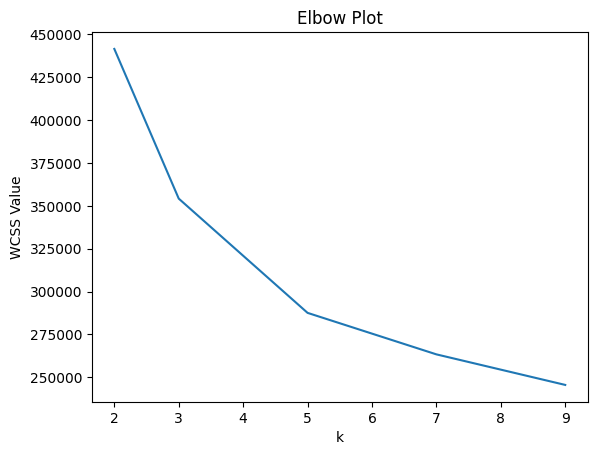

In [53]:
import kmeans
kmeans.main(footbal_data_encoded.to_numpy())

- From the graph we can choose 5 as the optimal number of clusters.

----